In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [5]:
xtrain.shape

(60000, 28, 28)

In [6]:
ytrain.shape

(60000,)

In [7]:
xtest.shape

(10000, 28, 28)

In [8]:
import os
import cv2

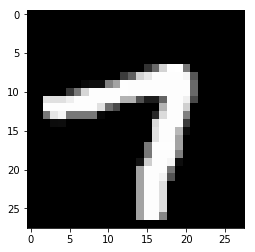

In [9]:
for i in range(0,6):
    randum=np.random.randint(0,len(xtrain))
    img=xtrain[randum]
    plt.imshow(img,cmap='gray')
    plt.show

In [10]:
img_row=xtrain[0].shape[0]
img_col=xtrain[1].shape[0]

In [11]:
#reshapin the data to keras format
xtrain=xtrain.reshape(xtrain.shape[0],img_row,img_col,1)
xtest=xtest.reshape(xtest.shape[0],img_row,img_col,1)
input_img=(img_row,img_col,1)


In [12]:
xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')

In [13]:
xtrain/=255

In [14]:
xtest/=255

In [15]:
xtrain.dtype

dtype('float32')

In [16]:
print(ytrain)

[5 0 4 ... 5 6 8]


In [17]:
print(ytest)

[7 2 1 ... 4 5 6]


In [18]:
from keras.utils import np_utils

In [19]:
ytrain=np_utils.to_categorical(ytrain)

In [20]:
ytest=np_utils.to_categorical(ytest)

In [21]:
num_class=ytest.shape[1]


In [22]:
num_class

10

In [23]:
from keras.models import Sequential
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Convolution2D

In [24]:
model=Sequential()

W0722 08:18:50.900472  4580 deprecation_wrapper.py:119] From D:\anacondaINstall\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [25]:
model.add(Convolution2D(32,kernel_size=(3,3),input_shape=(img_row,img_col,1),activation='relu'))


W0722 08:18:52.322957  4580 deprecation_wrapper.py:119] From D:\anacondaINstall\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0722 08:18:52.786491  4580 deprecation_wrapper.py:119] From D:\anacondaINstall\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [26]:
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

W0722 08:18:52.887851  4580 deprecation_wrapper.py:119] From D:\anacondaINstall\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0722 08:18:52.891841  4580 deprecation_wrapper.py:119] From D:\anacondaINstall\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0722 08:18:52.983513  4580 deprecation.py:506] From D:\anacondaINstall\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [27]:
model.add(Flatten())

In [28]:
model.add(Dense(output_dim=128,activation='relu'))
model.add(Dense(output_dim=num_class,activation='softmax'))

D:\anacondaINstall\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  """Entry point for launching an IPython kernel.
D:\anacondaINstall\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  


In [29]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())


W0722 08:18:53.372685  4580 deprecation_wrapper.py:119] From D:\anacondaINstall\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0722 08:18:53.388157  4580 deprecation_wrapper.py:119] From D:\anacondaINstall\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________
None

In [30]:
ytest.shape

(10000, 10)

In [31]:
batch_size=32
epochs=10
history=model.fit(xtrain,
                  ytrain,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_data=(xtest,ytest))
score=model.evaluate(xtest,ytest,verbose=0)
print('lose: ',score[0])
print('accuray: ',score[1])


W0722 08:18:53.913373  4580 deprecation.py:323] From D:\anacondaINstall\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 39s 646us/step - loss: 0.1613 - acc: 0.9512 - val_loss: 0.0584 - val_acc: 0.9811
Epoch 2/10
60000/60000 [==============================] - 43s 721us/step - loss: 0.0637 - acc: 0.9807 - val_loss: 0.0504 - val_acc: 0.9842
Epoch 3/10
60000/60000 [==============================] - 42s 707us/step - loss: 0.0480 - acc: 0.9857 - val_loss: 0.0519 - val_acc: 0.9827
Epoch 4/10
60000/60000 [==============================] - 43s 720us/step - loss: 0.0392 - acc: 0.9884 - val_loss: 0.0509 - val_acc: 0.9846
Epoch 5/10
60000/60000 [==============================] - 43s 710us/step - loss: 0.0341 - acc: 0.9898 - val_loss: 0.0448 - val_acc: 0.9869
Epoch 6/10
60000/60000 [==============================] - 43s 719us/step - loss: 0.0310 - acc: 0.9914 - val_loss: 0.0438 - val_acc: 0.9871
Epoch 7/10
60000/60000 [==============================] - 44s 733us/step - loss: 0.0270 - acc: 0.9920 - val_loss: 0.

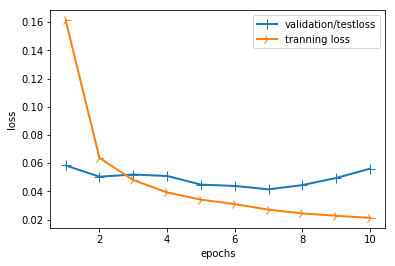

In [32]:
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)

line1=plt.plot(epochs,val_loss_values,label=('validation/testloss'))
line2=plt.plot(epochs,loss_values,label=('tranning loss'))
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

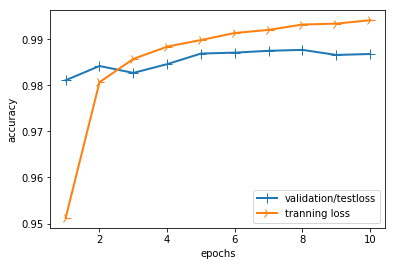

In [33]:
history_dict=history.history
acc_values=history_dict['acc']
val_acc_values=history_dict['val_acc']
epochs=range(1,len(loss_values)+1)

line1=plt.plot(epochs,val_acc_values,label=('validation/testloss'))
line2=plt.plot(epochs,acc_values,label=('tranning loss'))
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [34]:
model.save("mnist.h5")
print("model saved")

model saved


In [80]:
from keras.models import load_model
classifier=load_model('mnist.h5')

In [81]:
classifier

In [85]:
def draw_test(name,pred,input_im):
    BLACK=[0,0,0]
    expanded_image=cv2.copyMakeBorder(input_im,0,0,0,imageL.shape[0],cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image=cv2.cvtColor(expanded_image,cv2.COLOR_GRAY2BGR)
    cv2.imshow(name,expanded_image)
    
for i in range(0,10):
    rand=np.random.randint(0,len(xtest))
    input_im=xtest[rand]
    
    imageL=cv2.resize(input_im,None,fx=4,fy=4,interpolation=cv2.INTER_CUBIC)
    input_im=input_im.reshape(1,28,28,1)
    
    res=str(classifier.predict_classes(input_im,1,verbose=0)[0])
    
    draw_test("prediction",res,imageL)
    cv2.waitKey(0)

cv2.destroyAllWindows()

In [93]:
a=model.predict(xtest[:4])


In [94]:
a.round(3)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [95]:
ytest[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [103]:
a=a.astype(int)

In [106]:
df=pd.DataFrame(a.round(3))

In [107]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0


In [108]:
ytest=ytest.astype(int)

In [109]:
df2=pd.DataFrame(ytest)

In [110]:
df2.head()

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0


In [114]:
mnist= pd.DataFrame(ynew)


In [122]:
mnist.to_csv("mnist.csv",index_label=['numbers'])

In [123]:
df3=pd.read_csv("mnist.csv")

In [125]:
##FINAL PREDICTED DATASET
df3.head()

,numbers,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,1,0,0,0,0,0,0,0
2,2,0,1,0,0,0,0,0,0,0,0
3,3,1,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,1,0,0,0,0,0


In [126]:
##TEST DATASET
df2.head()

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
